In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Concatenate 5 data framess
df_18 = pd.read_csv(r'/Users/Nabzter/Documents/Masters/Data Programming/Coursework/assignment 1/2018.csv')

df_17 = pd.read_csv(r'/Users/Nabzter/Documents/Masters/Data Programming/Coursework/assignment 1/2017.csv')

df_16 = pd.read_csv(r'/Users/Nabzter/Documents/Masters/Data Programming/Coursework/assignment 1/2016.csv')

df_15 = pd.read_csv(r'/Users/Nabzter/Documents/Masters/Data Programming/Coursework/assignment 1/2015.csv')

df_14 = pd.read_csv(r'/Users/Nabzter/Documents/Masters/Data Programming/Coursework/assignment 1/2014.csv')

#Drop Operations Column

data = [df_18, df_17, df_16, df_15, df_14]
df = pd.concat(data)
df = df.drop(['Operations'], axis = 1)

#Convert string to datetime:

df['Incident Date'] = pd.to_datetime(df['Incident Date'])

df['Month'] = pd.to_datetime(df['Incident Date']).dt.strftime('%m')
df['Year'] = pd.to_datetime(df['Incident Date']).dt.strftime('%y')
df

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
0,2018-11-25,Texas,Houston,4500 block of Yale St,1,3,11,18
1,2018-11-25,Alabama,Demopolis,Floyd St and Field St,2,2,11,18
2,2018-11-25,California,Oakland,1000 block of 24th St,0,4,11,18
3,2018-11-24,Florida,Orlando,5898 S Orange Blossom Trail,2,2,11,18
4,2018-11-23,Florida,Miami,5801 NW 27th Ave,2,5,11,18
5,2018-11-22,Indiana,Fort Wayne,6100 block of Downingtown Dr,3,2,11,18
6,2018-11-21,Missouri,Saint Louis,4200 block of Shreve Ave,0,4,11,18
7,2018-11-19,Pennsylvania,Philadelphia,5100 block of Malcolm St,4,0,11,18
8,2018-11-19,Colorado,Denver,1200 21st Street,1,4,11,18
9,2018-11-18,California,Los Angeles (Watts),95th St and Defiance Ave,1,4,11,18


#### Total incidents (All killed and injured within 5 years)

In [2]:
t_inc = df['# Killed'].sum() + df['# Injured'].sum()
t_inc

8920

#### Total Killed (within 5 years)

In [3]:
t_kill = df['# Killed'].sum()
t_kill

1883

#### Total Injured (within 5 years)

In [4]:
t_inj = df['# Injured'].sum()
t_inj

7037

#### Number of killed and injured each year (2014 - 2018)

In [5]:
t_yr = df.groupby(['Year']).sum()
t_yr

,# Killed,# Injured
Year,,
14,265,1079
15,368,1337
16,451,1538
17,437,1803
18,362,1280


#### Number of killed and injured per month in last 5 years

In [6]:
t_mth = df.groupby(['Month']).sum()
t_mth

,# Killed,# Injured
Month,,
01,133,368
02,168,375
03,99,381
04,138,510
05,146,579
06,230,822
07,184,882
08,156,741
09,145,594


### <font color='red'>Note: There are 4 states where no data has been collected. This could be due to difficulties in retreiving such data: Hawaii, Idaho, New Hampshire & Wyoming.</font>  
### Total number of states in dataset = 46

In [7]:
# Show number of killed and injured per state
t_stt = df.groupby(['State']).sum()

print (t_stt)
print ('\nStates =',t_stt.count(axis= 0)[0])

                      # Killed  # Injured
State                                    
Alabama                     39        168
Alaska                       0          6
Arizona                     37         52
Arkansas                    18         85
California                 201        761
Colorado                    23         66
Connecticut                  5         66
Delaware                     6         18
District of Columbia         7        103
Florida                    196        568
Georgia                     78        267
Illinois                   111        668
Indiana                     39        151
Iowa                         2         16
Kansas                      24         47
Kentucky                    21         85
Louisiana                   60        279
Maine                        9          1
Maryland                    45        147
Massachusetts                5         62
Michigan                    45        194
Minnesota                   13    

#### Most amount killed in single incident

In [8]:
max_killed = df['# Killed'].max()

df[df['# Killed'] == max_killed]

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
71,2017-10-01,Nevada,Las Vegas,3950 Las Vegas Blvd S,59,441,10,17


#### Least amount killed in single incident  (789 incidents where no one was killed)

In [9]:
min_killed = df['# Killed'].min()

df[df['# Killed'] == min_killed]

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
2,2018-11-25,California,Oakland,1000 block of 24th St,0,4,11,18
6,2018-11-21,Missouri,Saint Louis,4200 block of Shreve Ave,0,4,11,18
17,2018-11-03,New York,Watertown,136 Franklin St,0,5,11,18
18,2018-11-02,California,Long Beach (North Long Beach),5800 block of Brayton Ave,0,4,11,18
20,2018-11-01,Minnesota,Minneapolis,3400 block of Girard Ave N,0,5,11,18
24,2018-10-30,California,Los Angeles,65th Place and Vermont Avenue,0,5,10,18
25,2018-10-29,California,Riverside,3252 Mission Inn Ave,0,7,10,18
27,2018-10-27,Tennessee,Memphis,4275 Ladyslipper,0,5,10,18
30,2018-10-24,Illinois,Chicago,6200 block of S King Dr,0,5,10,18
31,2018-10-22,Illinois,Chicago,9231 S Cottage Grove Av,0,6,10,18


# Graphs

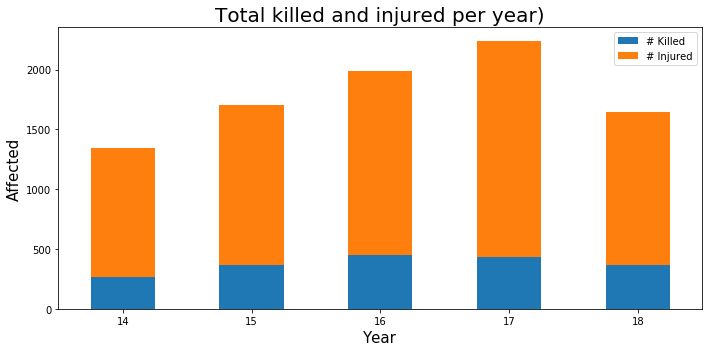

In [10]:
t_yr.plot.bar(stacked = True, figsize = (10,5))
plt.title('Total killed and injured per year)', size = 20)
plt.xticks(rotation=0)
plt.xlabel('Year', size = 15)
plt.ylabel('Affected', size = 15)
plt.tight_layout()
plt.legend(loc='best')

plt.show()

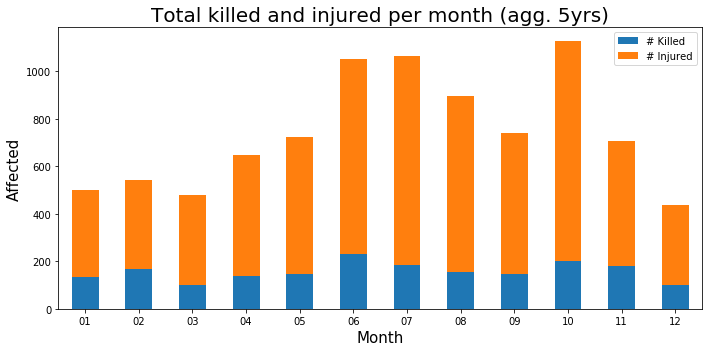

In [11]:
t_mth.plot.bar(stacked = True, figsize = (10,5))
plt.title('Total killed and injured per month (agg. 5yrs)', size = 20)
plt.xticks(rotation=0)
plt.xlabel('Month', size = 15)
plt.ylabel('Affected', size = 15)
plt.tight_layout()
plt.legend(loc='best')

plt.show()

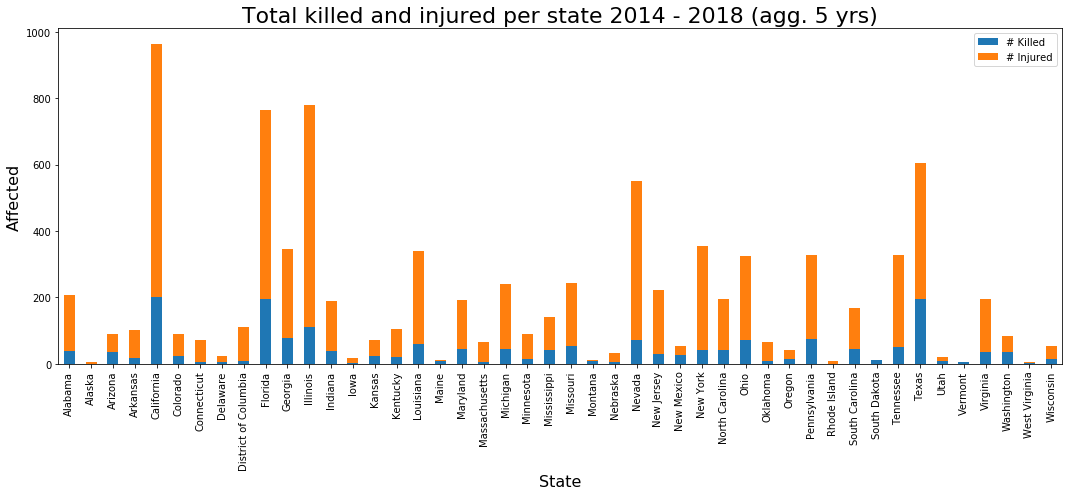

In [12]:
t_stt.plot.bar(stacked = True, figsize = (15,7))
plt.title('Total killed and injured per state 2014 - 2018 (agg. 5 yrs)', size = 22)
plt.xticks(rotation=90)
plt.xlabel('State', size = 16)
plt.ylabel('Affected', size = 16)
plt.tight_layout()
plt.legend(loc='best')

plt.show()